# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style = "darkgrid")

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import math as math

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [3]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [4]:
X_dataframe = pd.DataFrame(X, columns = columns)
X_train, X_test, y_train, y_test = train_test_split(X_dataframe, y, test_size = 0.2, random_state = 0)
print(f'x training set length is {len(X_train)}')
print(f'x testing set length is {len(X_test)}')
print(f'y training set length is {len(y_train)}')
print(f'y testing set length is {len(y_test)}')

x training set length is 404
x testing set length is 102
y training set length is 404
y testing set length is 102


---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_train = sm.add_constant(scaled_X_train)

scaled_X_test = scaler.transform(X_test)
scaled_X_test = sm.add_constant(scaled_X_test)

linearReg = sm.OLS(y_train, scaled_X_train)
ridge = sm.OLS(y_train, scaled_X_train)
lasso = sm.OLS(y_train, scaled_X_train)

trained_lin = linearReg.fit()
trained_rid = ridge.fit_regularized(alpha=0.01, L1_wt=2*sys.float_info.epsilon, refit = True)
trained_las = lasso.fit_regularized(alpha=0.01, L1_wt=1, refit = True)

prediction_lin = trained_lin.predict(scaled_X_test)
prediction_rid = trained_rid.predict(scaled_X_test)
prediction_las = trained_las.predict(scaled_X_test)

lin_rmse = mean_squared_error(y_test, prediction_lin, squared=False)
rid_rmse = mean_squared_error(y_test, prediction_rid, squared=False)
las_rmse = mean_squared_error(y_test, prediction_las, squared=False)
lin_r2_score = r2_score(y_test, prediction_lin)
rid_r2_score = r2_score(y_test, prediction_rid)
las_r2_score = r2_score(y_test, prediction_las)

print(f'RMSE for linear regression is {lin_rmse}')
print(f'RMSE for ridge is {rid_rmse}')
print(f'RMSE for lasso is {las_rmse}')
print()
print(f'R2_Score for linear regression is {lin_r2_score}')
print(f'R2_Score for ridge is {rid_r2_score}')
print(f'R2_Score for lasso is {las_r2_score}')

RMSE for linear regression is 5.783509315085141
RMSE for ridge is 5.783509315085141
RMSE for lasso is 5.784640655018173

R2_Score for linear regression is 0.5892223849182501
R2_Score for ridge is 0.5892223849182501
R2_Score for lasso is 0.5890616608498134


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [6]:
print(f'summary for linear regression {trained_lin.summary()}\n\n')
print(f'summary for ridge {trained_rid.summary()}\n\n')
print(f'summary for lasso {trained_las.summary()}')

summary for linear regression                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 09 Oct 2021   Prob (F-statistic):          9.64e-117
Time:                        21:12:32   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6119 

```As we look on our wonderful summary of values we can see that there are some variants that are insignificant. We can determine that from their pvalues (the "P>|t|" column). If the pvalue is close to 1, it is supposed that the probability of the variant's significance is too low, so the coefficient can be made zero.
In the linear regression model we see that x3 and x7 have pvalues big enough for us to consider these parameters' insignificance. Also worth noticing that the weight of x3 is the smallest, although not a zero, and the weight of x7 is the second smallest.
In the ridge summary these pvalues are big as well. The weights are identical to those of the linear regression model.
In the lasso model we see that the model itself took care of the x3 coefficient and equalled it to 0 due to the pvalue size, however the x7 parameter is considered valid.
Overall, the weights in these three models are similar, and the lasso model is the only one containing the true zero weight corresponding to the variable which in the other models also has the lightest weight and the biggest pvalue. Based on this we can theoretize that the lasso model is better than the others, as it can determine the insignificant values itself.```

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [21]:
def fit(X_dataframe, y):
    X_train, X_test, y_train, y_test = train_test_split(X_dataframe, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    scaled_X_train = sm.add_constant(scaled_X_train)
    scaled_X_test = sm.add_constant(scaled_X_test)
    linearReg = sm.OLS(y_train, scaled_X_train)
    trained_lin = linearReg.fit()
    prediction_lin = trained_lin.predict(scaled_X_test)
    new_rmse = mean_squared_error(y_test, prediction_lin, squared=False)

    return trained_lin, new_rmse


def back_elimination(dataframe, y):
    best_dataframe = dataframe
    best_drop, best_rmse = fit(best_dataframe, y)
    
    while True:
        drop = best_drop
        min_rmse = float('inf')
        drop_dataframe = best_dataframe
        
        for i in range(best_dataframe.shape[1]):
            i_dataframe = best_dataframe.drop(best_dataframe.columns[i-1], axis=1)
            i_drop, i_rmse = fit(i_dataframe, y)
       #     print(f'curr i = {i} curr best rmse = {best_rmse} curr rmse = {i_rmse}')
            if i_rmse <= min_rmse:
        #        print(f'find min {i_rmse} <= {min_rmse}')
                min_rmse = i_rmse
                drop = i_drop
                drop_dataframe = i_dataframe
        if min_rmse > best_rmse:
    #        print("go break")
            break
        else:
         #   print("dropayem")
            best_drop = drop
            best_rmse = min_rmse
            best_dataframe = drop_dataframe
            
            
    return best_drop, best_rmse

res, res_rmse = back_elimination(X_dataframe, y)

print(f'Backward Elimination results {res.summary2()}')
print(f'rmse for this elimination is {res_rmse} while for common linear regression it was {lin_rmse}')

Backward Elimination results                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.766    
Dependent Variable: y                AIC:                2368.9876
Date:               2021-10-11 12:35 BIC:                2421.0060
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           12               F-statistic:        110.9    
Df Residuals:       391              Prob (F-statistic): 9.16e-118
R-squared:          0.773            Scale:              19.971   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2223   101.7003   0.0000   22.1748   23.0490
x1        -0.9684     0.2975    -3.2556   0.0012   -1.5532   -0.3836
x2         1.0682     0.3365     3.1742   0.0016    0.4066    1.7299
x3         0.0402     0.4422     0.0910

```I decided to write a backward elimination and it seems that the algorithm decided to drop the x7 parameter, even though x3 has a bigger pvalue (but it's not a pvalue elimination so that's acceptable). Probably the improvement of model wasn't significant with any other columns being dropped, so we only drop x7. Also the rmse for this elimination is smaller than that of the common linear regression we did earlier so probably this means something is working)```

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [20]:
alphas = np.logspace(-4, 3)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(scaled_X_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print(f'Best alpha = {best_alpha}')

Best alpha = 7.196856730011514


---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [121]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        if w0 is None:
            self.w0 = np.zeros(X.shape[1] + 1)
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
        self.h = 0
      
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        w_tr = np.transpose(self.w)
        return X.dot(w_tr)
        
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        prediction = self.predict(X)
        diff = prediction - y
        return 2 * np.dot(X.T, diff) / y.shape[0]
    
    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        prediction = self.predict(X)
        return mean_squared_error(prediction, y)
    
    def gradient_descent(self, X, y):
        weight = self.w - self.eta * self.calc_gradient(X, y)
        return weight
        
    def stochastic_descent(self, X, y):
        choosing = np.random.randint(0, len(X), math.floor(self.delta * len(X)))
        chosen_x = X[choosing, :]
        chosen_y = y[choosing]
        weight = self.w - self.eta * self.calc_gradient(chosen_x, chosen_y)
        return weight
        
    def momentum(self, X, y):
        step = self.alpha * self.h
        self.h = step + self.eta* self.calc_gradient(X, y)
        weight = self.w - self.h
        return weight
            
    def descent_type(self, X, y):
        if self.gd_type == 'GradientDescent':
            return self.gradient_descent(X, y)
        elif self.gd_type == 'StochasticDescent': 
            return self.stochastic_descent(X, y)
        elif self.gd_type == 'Momentum': 
            return self.momentum(X, y)
        
        raise Exception('wrong type')
        
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        self.w = self.w0
        
        for i in range(self.max_iter):
        
            weight = self.descent_type(X, y)
            
            temp = weight
            weight = self.w
            self.w = temp
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
        
            if self.tolerance > np.linalg.norm(self.w - weight):
                break
        
        return self

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

```First we will compare sklearn Linear Regression with our LinReg Gradient Descent```

In [122]:
sklearn_lin = sklearn.linear_model.LinearRegression()

weights = np.random.rand(scaled_X_train[0].size)
grad_lin = LinReg(gd_type = 'GradientDescent', w0 = weights)

trained_sklearn_lin = sklearn_lin.fit(scaled_X_train, y_train)
trained_grad_lin = grad_lin.fit(scaled_X_train, y_train)

prediction_sklearn_lin = trained_sklearn_lin.predict(scaled_X_test)
prediction_grad_lin = trained_grad_lin.predict(scaled_X_test)

sklearn_lin_rmse = mean_squared_error(y_test, prediction_sklearn_lin, squared=False)
grad_lin_rmse = mean_squared_error(y_test, prediction_grad_lin, squared=False)
sklearn_lin_r2_score = r2_score(y_test, prediction_sklearn_lin)
grad_lin_r2_score = r2_score(y_test, prediction_grad_lin)

print(f'RMSE for sklearn linear regression is {sklearn_lin_rmse}')
print(f'RMSE for custom linear regression is {grad_lin_rmse}')
print(f'R2_Score for sklearn linear regression is {sklearn_lin_r2_score}')
print(f'R2_Score for custom linear regression is {grad_lin_r2_score}')

RMSE for sklearn linear regression is 5.783509315085141
RMSE for custom linear regression is 5.81921719706483
R2_Score for sklearn linear regression is 0.58922238491825
R2_Score for custom linear regression is 0.5841343739762311


```As we can see, the sklearn model RMSE is slightly smaller than that of the custom gradient descent, while the r2_score is a little smaller for the custom gradient descent. Supposedly, we made a model that's not entirely horrible, but still not as good as the one from the library. hoorray?```

```Now let's compare custom gradient, stochastic and momentum descent with some options for iterations and alpha parameter. We'll find the best ones using GridSearch and then add one below and above for the test purposes. To avoid having too many results i'll have four options for gradient and stochastic descent: without iterations bound and with three forementioned bounds, as well as for momentum descent with the best alpha parameter. For other two alpha parameters i will only have unbound iterations.```

In [123]:
momentum_alphas = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
searcher = GridSearchCV(LinReg(), [{"gd_type": ["Momentum"], "alpha": momentum_alphas}], scoring = "neg_root_mean_squared_error", cv = 5)
searcher.fit(scaled_X_train, y_train)
best_momentum_alpha = searcher.best_params_["alpha"]
print(f'Best momentum alpha = {best_momentum_alpha}')

grad_iters = [500, 750, 1000, 1250, 1500, 1750, 2000]
searcher = GridSearchCV(LinReg(), [ {"gd_type": ["GradientDescent"], "max_iter": grad_iters}], scoring = "neg_root_mean_squared_error", cv = 5)
searcher.fit(scaled_X_train, y_train)
best_grad_iters = searcher.best_params_["max_iter"]
print(f'Best gradient descent iterations = {best_grad_iters}')

grad_iters = [500, 750, 1000, 1250, 1500, 1750, 2000]
searcher = GridSearchCV(LinReg(), [ {"gd_type": ["StochasticDescent"], "max_iter": grad_iters, "delta": [0.3]}], scoring = "neg_root_mean_squared_error", cv = 5)
searcher.fit(scaled_X_train, y_train)
best_stoch_iters = searcher.best_params_["max_iter"]
print(f'Best stochastic descent iterations = {best_stoch_iters}')

grad_iters = [500, 750, 1000, 1250, 1500, 1750, 2000]
searcher = GridSearchCV(LinReg(), [{ "gd_type": ["Momentum"], "alpha": [best_momentum_alpha], "max_iter": grad_iters}], scoring = "neg_root_mean_squared_error", cv = 5)
searcher.fit(scaled_X_train, y_train)
best_mom_iters = searcher.best_params_["max_iter"]
print(f'Best momentum descent iterations = {best_mom_iters}')

Best momentum alpha = 0.1
Best gradient descent iterations = 1250
Best stochastic descent iterations = 1250
Best momentum descent iterations = 1000


In [129]:
grad_iterations1 = LinReg(gd_type = 'GradientDescent', w0 = weights, max_iter = math.floor(best_grad_iters / 2))
grad_iterations2 = LinReg(gd_type = 'GradientDescent', w0 = weights, max_iter = best_grad_iters)
grad_iterations3 = LinReg(gd_type = 'GradientDescent', w0 = weights, max_iter = best_grad_iters * 2)
stoch = LinReg(gd_type = 'StochasticDescent', w0 = weights, delta = 0.3)
stoch_iterations1 = LinReg(gd_type='StochasticDescent', w0 = weights, max_iter = math.floor(best_stoch_iters / 2), delta = 0.3)
stoch_iterations2 = LinReg(gd_type='StochasticDescent', w0 = weights, max_iter = best_stoch_iters, delta = 0.3)
stoch_iterations3 = LinReg(gd_type='StochasticDescent', w0 = weights, max_iter = best_stoch_iters * 2, delta = 0.3)
mom_a1 = LinReg(gd_type = 'Momentum', w0 = weights, alpha = best_momentum_alpha / 2)
mom_a2 = LinReg(gd_type = 'Momentum', w0 = weights, alpha = best_momentum_alpha)
mom_a2_iterations1 = LinReg(gd_type = 'Momentum', w0 = weights, max_iter = math.floor(best_mom_iters / 2), alpha = best_momentum_alpha)
mom_a2_iterations2 = LinReg(gd_type = 'Momentum', w0 = weights, max_iter = best_mom_iters, alpha = best_momentum_alpha)
mom_a2_iterations3 = LinReg(gd_type = 'Momentum', w0 = weights, max_iter = best_mom_iters * 2, alpha = best_momentum_alpha)
mom_a3 = LinReg(gd_type = 'Momentum', w0 = weights, alpha = best_momentum_alpha * 2)

trained_grad_iterations1 = grad_iterations1.fit(scaled_X_train, y_train)
trained_grad_iterations2 = grad_iterations2.fit(scaled_X_train, y_train)
trained_grad_iterations3 = grad_iterations3.fit(scaled_X_train, y_train)
trained_stoch = stoch.fit(scaled_X_train, y_train)
trained_stoch_iterations1 = stoch_iterations1.fit(scaled_X_train, y_train)
trained_stoch_iterations2 = stoch_iterations2.fit(scaled_X_train, y_train)
trained_stoch_iterations3 = stoch_iterations3.fit(scaled_X_train, y_train)
trained_mom_a1 = mom_a1.fit(scaled_X_train, y_train)
trained_mom_a2 = mom_a2.fit(scaled_X_train, y_train)
trained_mom_a2_iterations1 = mom_a2_iterations1.fit(scaled_X_train, y_train)
trained_mom_a2_iterations2 = mom_a2_iterations2.fit(scaled_X_train, y_train)
trained_mom_a2_iterations3 = mom_a2_iterations3.fit(scaled_X_train, y_train)
trained_mom_a3 = mom_a3.fit(scaled_X_train, y_train)

prediction_grad_iterations1 = trained_grad_iterations1.predict(scaled_X_test)
prediction_grad_iterations2 = trained_grad_iterations2.predict(scaled_X_test)
prediction_grad_iterations3 = trained_grad_iterations3.predict(scaled_X_test)
prediction_stoch = trained_stoch.predict(scaled_X_test)
prediction_stoch_iterations1 = trained_stoch_iterations1.predict(scaled_X_test)
prediction_stoch_iterations2 = trained_stoch_iterations2.predict(scaled_X_test)
prediction_stoch_iterations3 = trained_stoch_iterations3.predict(scaled_X_test)
prediction_mom_a1 = trained_mom_a1.predict(scaled_X_test)
prediction_mom_a2 = trained_mom_a2.predict(scaled_X_test)
prediction_mom_a2_iterations1 = trained_mom_a2_iterations1.predict(scaled_X_test)
prediction_mom_a2_iterations2 = trained_mom_a2_iterations2.predict(scaled_X_test)
prediction_mom_a2_iterations3 = trained_mom_a2_iterations3.predict(scaled_X_test)
prediction_mom_a3 = trained_mom_a3.predict(scaled_X_test)

grad_iterations1_rmse = mean_squared_error(y_test, prediction_grad_iterations1, squared=False)
grad_iterations2_rmse = mean_squared_error(y_test, prediction_grad_iterations2, squared=False)
grad_iterations3_rmse = mean_squared_error(y_test, prediction_grad_iterations3, squared=False)
stoch_rmse = mean_squared_error(y_test, prediction_stoch, squared=False)
stoch_iterations1_rmse = mean_squared_error(y_test, prediction_stoch_iterations1, squared=False)
stoch_iterations2_rmse = mean_squared_error(y_test, prediction_stoch_iterations2, squared=False)
stoch_iterations3_rmse = mean_squared_error(y_test, prediction_stoch_iterations3, squared=False)
mom_a1_rmse =  mean_squared_error(y_test, prediction_mom_a1, squared=False)
mom_a2_rmse =  mean_squared_error(y_test, prediction_mom_a2, squared=False)
mom_a2_iterations1_rmse =  mean_squared_error(y_test, prediction_mom_a2_iterations1, squared=False)
mom_a2_iterations2_rmse =  mean_squared_error(y_test, prediction_mom_a2_iterations2, squared=False)
mom_a2_iterations3_rmse =  mean_squared_error(y_test, prediction_mom_a2_iterations3, squared=False)
mom_a3_rmse =  mean_squared_error(y_test, prediction_mom_a3, squared=False)

grad_iterations1_r2_score = r2_score(y_test, prediction_grad_iterations1)
grad_iterations2_r2_score = r2_score(y_test, prediction_grad_iterations2)
grad_iterations3_r2_score = r2_score(y_test, prediction_grad_iterations3)
stoch_r2_score = r2_score(y_test, prediction_stoch)
stoch_iterations1_r2_score = r2_score(y_test, prediction_stoch_iterations1)
stoch_iterations2_r2_score = r2_score(y_test, prediction_stoch_iterations2)
stoch_iterations3_r2_score = r2_score(y_test, prediction_stoch_iterations3)
mom_a1_r2_score =  r2_score(y_test, prediction_mom_a1)
mom_a2_r2_score =  r2_score(y_test, prediction_mom_a2)
mom_a2_iterations1_r2_score =  r2_score(y_test, prediction_mom_a2_iterations1)
mom_a2_iterations2_r2_score =  r2_score(y_test, prediction_mom_a2_iterations2)
mom_a2_iterations3_r2_score =  r2_score(y_test, prediction_mom_a2_iterations3)
mom_a3_r2_score =  r2_score(y_test, prediction_mom_a3)


print(f'RMSE for gradient descent is {grad_lin_rmse}')
print(f'RMSE for gradient descent with {math.floor(best_grad_iters / 2)} iterations is {grad_iterations1_rmse}')
print(f'RMSE for gradient descent with {best_grad_iters} iterations is {grad_iterations2_rmse}')
print(f'RMSE for gradient descent with {best_grad_iters * 2} iterations is {grad_iterations3_rmse}')
print(f'RMSE for stochastic descent is {stoch_rmse}')
print(f'RMSE for stochastic descent with {math.floor(best_stoch_iters / 2)} iterations is {stoch_iterations1_rmse}')
print(f'RMSE for stochastic descent with {best_stoch_iters} iterations is {stoch_iterations2_rmse}')
print(f'RMSE for stochastic descent with {best_stoch_iters * 2} iterations is {stoch_iterations3_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha / 4} is {mom_a1_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha} is {mom_a2_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha} and {math.floor(best_mom_iters / 2)} iterations is {mom_a2_iterations1_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha} and {best_mom_iters} iterations is {mom_a2_iterations2_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha} and {best_mom_iters * 2} iterations is {mom_a2_iterations3_rmse}')
print(f'RMSE for momentum descent with alpha = {best_momentum_alpha * 4} is {mom_a3_rmse}')
print()

print(f'R2_Score for gradient descent is {grad_lin_r2_score}')
print(f'R2_Score for gradient descent with {math.floor(best_grad_iters / 2)} iterations is {grad_iterations1_r2_score}')
print(f'R2_Score for gradient descent with {best_grad_iters} iterations is {grad_iterations2_r2_score}')
print(f'R2_Score for gradient descent with {best_grad_iters * 2} iterations is {grad_iterations3_r2_score}')
print(f'R2_Score for stochastic descent is {stoch_r2_score}')
print(f'R2_Score for stochastic descent with {math.floor(best_stoch_iters / 2)} iterations is {stoch_iterations1_r2_score}')
print(f'R2_Score for stochastic descent with {best_stoch_iters} iterations is {stoch_iterations2_r2_score}')
print(f'R2_Score for stochastic descent with {best_stoch_iters * 2} iterations is {stoch_iterations3_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha / 4} is {mom_a1_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha} is {mom_a2_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha} and {math.floor(best_mom_iters / 2)} iterations is {mom_a2_iterations1_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha} and {best_mom_iters} iterations is {mom_a2_iterations2_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha} and {best_mom_iters * 2} iterations is {mom_a2_iterations3_r2_score}')
print(f'R2_Score for momentum descent with alpha = {best_momentum_alpha * 4} is {mom_a3_r2_score}')

RMSE for gradient descent is 5.81921719706483
RMSE for gradient descent with 625 iterations is 5.860604858132584
RMSE for gradient descent with 1250 iterations is 5.806722900084907
RMSE for gradient descent with 2500 iterations is 5.787413475593856
RMSE for stochastic descent is 5.818952427414873
RMSE for stochastic descent with 625 iterations is 5.84933936998493
RMSE for stochastic descent with 1250 iterations is 5.857540188746408
RMSE for stochastic descent with 2500 iterations is 5.788392313430522
RMSE for momentum descent with alpha = 0.025 is 5.815982366937715
RMSE for momentum descent with alpha = 0.1 is 5.812811200800716
RMSE for momentum descent with alpha = 0.1 and 500 iterations is 5.874694351078448
RMSE for momentum descent with alpha = 0.1 and 1000 iterations is 5.812811200800716
RMSE for momentum descent with alpha = 0.1 and 2000 iterations is 5.789159171566389
RMSE for momentum descent with alpha = 0.4 is 5.8066970423219875

R2_Score for gradient descent is 0.584134373976

```So, we got A Number of results...```

```Let's take a look at rmse: for gradient descent. It seems that, the more iterations, the better. (Probably because of the cross-validation in the grid search, it is not guaranteed that the found value is the absolute best for every combination of training and testing sets, and when we validate it with the actual test and not a fold of training set, the result might not be as impressive.)```

```The same is true for the stochastic descend, the results at 2000 iterations are better. Also they are alightly worse than the results of common gradient descent, probably because of the same randomising issue as with grid search.```

```For the momentum descent the found alpha (0.1) indeed seems to be the oprimal one, though more iterations still show the best result. This result is also better than that of the stochastic descend but worse than that of gradient descend.```

```R2_Score tells us pretty much the same thing.```

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

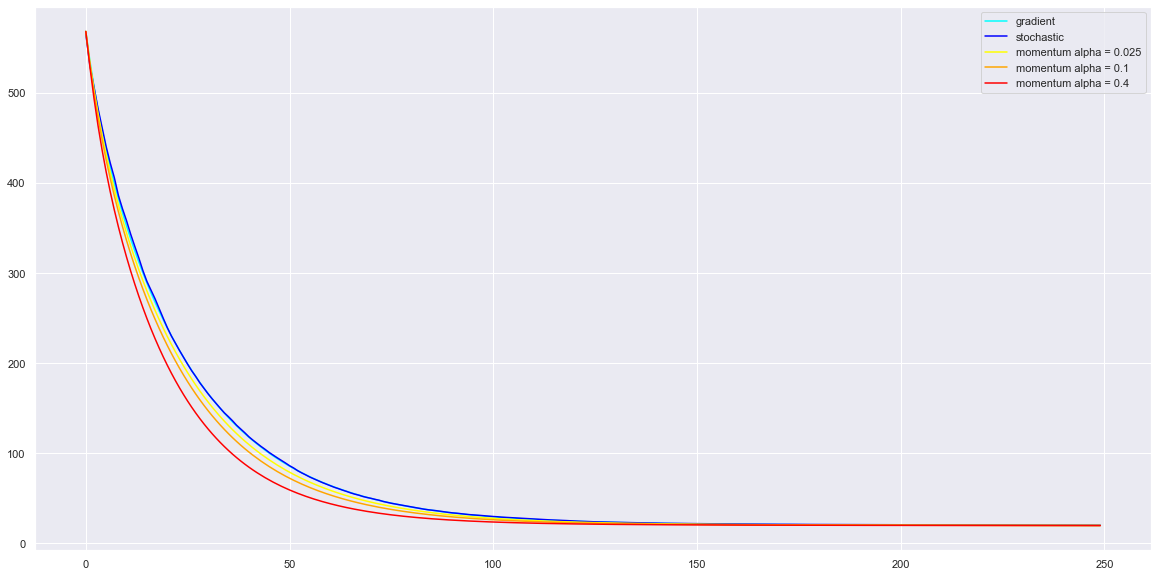

In [137]:
plt.figure(figsize=(20, 10))
plt.plot(trained_grad_iterations3.loss_history[:250], label='gradient', color = 'cyan')
plt.plot(trained_stoch_iterations3.loss_history[:250], label='stochastic', color = 'blue')
plt.plot(trained_mom_a1.loss_history[:250], label = f'momentum alpha = {best_momentum_alpha / 4}', color = 'yellow')
plt.plot(trained_mom_a2_iterations3.loss_history[:250], label = f'momentum alpha = {best_momentum_alpha}', color = 'orange')
plt.plot(trained_mom_a3.loss_history[:250], label = f'momentum alpha = {best_momentum_alpha * 4}', color = 'red')
plt.legend()
plt.show()

```Here is the dependence of loss function from the iteration index (on the first 250 iterations because after that it's too good and boring to look at). All of methods seem to make loss drop relatively fast, though momentum with big alpha seems to be the fastest and stochastic descent the slowest.```

```Just for fun, let's take some weird deltas and alphas and see what happens...```

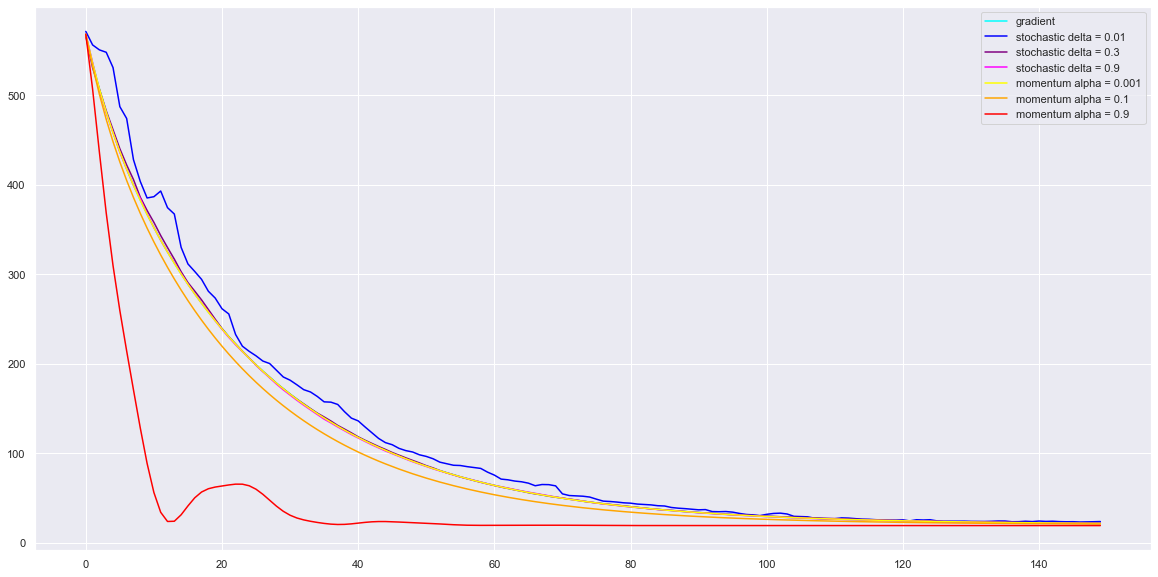

In [142]:
stoch_little_delta = LinReg(gd_type = 'StochasticDescent', w0 = weights, delta = 0.01)
stoch_big_delta = LinReg(gd_type = 'StochasticDescent', w0 = weights, delta = 0.9)
mom_little_alpha = LinReg(gd_type = 'Momentum', w0 = weights, alpha = 0.001)
mom_big_alpha = LinReg(gd_type = 'Momentum', w0 = weights, alpha = 0.9)

trained_stoch_little_delta = stoch_little_delta.fit(scaled_X_train, y_train)
trained_stoch_big_delta = stoch_big_delta.fit(scaled_X_train, y_train)
trained_mom_little_alpha = mom_little_alpha.fit(scaled_X_train, y_train)
trained_mom_big_alpha = mom_big_alpha.fit(scaled_X_train, y_train)

plt.figure(figsize=(20, 10))
plt.plot(trained_grad_iterations3.loss_history[:150], label = 'gradient', color = 'cyan')
plt.plot(trained_stoch_little_delta.loss_history[:150], label = 'stochastic delta = 0.01', color = 'blue')
plt.plot(trained_stoch_iterations3.loss_history[:150], label = 'stochastic delta = 0.3', color = 'purple')
plt.plot(trained_stoch_big_delta.loss_history[:150], label = 'stochastic delta = 0.9', color = 'magenta')
plt.plot(trained_mom_little_alpha.loss_history[:150], label = 'momentum alpha = 0.001', color = 'yellow')
plt.plot(trained_mom_a2_iterations3.loss_history[:150], label = f'momentum alpha = {best_momentum_alpha}', color = 'orange')
plt.plot(trained_mom_big_alpha.loss_history[:150], label = 'momentum alpha = 0.9', color = 'red')
plt.legend()
plt.show()

```As can be seen, the big alpha for momentum results in a steeper drop in loss, and a small delta for stochastic descend results in fluctuations, because then the set chosen for gradient calculation is just too small. Everything else is pretty normal.```